Author: Arya Pasha Gunawan

# Import Libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [88]:
df = pd.read_csv('./loan_customer.csv')

In [89]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [90]:
nums = ['loan_id','birth_date','phone_number','dependents','applicant_income','coapplicant_income','loan_amount','loan_term_month','loan_term_year','credit_history']
cats = ['gender','married','education','self_employed','has_credit_card','property_type','loan_status']

# Data Cleansing

## Handling missing values

In [91]:
df.isna().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [92]:
df = df.dropna()

In [93]:
df.isna().sum()

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
has_credit_card       0
property_type         0
loan_status           0
dtype: int64

## Handling duplicated data

In [94]:
df.duplicated().sum()

0

In [95]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
12,LP001028,1987-11-16,6.281128e+11,Male,Yes,2,Graduate,No,3073.0,8106.0,200000,360,30,1.0,no,house,APPROVE
21,LP001046,1984-06-25,6.285219e+11,Male,Yes,1,Graduate,No,5955.0,5625.0,315000,360,30,1.0,no,house,APPROVE
26,LP001068,1986-09-10,6.281377e+11,Male,Yes,0,Graduate,No,2799.0,2253.0,122000,360,30,1.0,no,apartment,APPROVE
27,LP001073,1989-02-05,6.281346e+11,Male,Yes,2,Not Graduate,No,4226.0,1040.0,110000,360,30,1.0,yes,house,APPROVE
28,LP001086,1978-11-21,6.285222e+10,Male,No,0,Not Graduate,No,1442.0,0.0,35000,360,30,1.0,no,house,REJECT


## Handling Outlier

In [96]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
12,LP001028,1987-11-16,6.281128e+11,Male,Yes,2,Graduate,No,3073.0,8106.0,200000,360,30,1.0,no,house,APPROVE
21,LP001046,1984-06-25,6.285219e+11,Male,Yes,1,Graduate,No,5955.0,5625.0,315000,360,30,1.0,no,house,APPROVE
26,LP001068,1986-09-10,6.281377e+11,Male,Yes,0,Graduate,No,2799.0,2253.0,122000,360,30,1.0,no,apartment,APPROVE
27,LP001073,1989-02-05,6.281346e+11,Male,Yes,2,Not Graduate,No,4226.0,1040.0,110000,360,30,1.0,yes,house,APPROVE
28,LP001086,1978-11-21,6.285222e+10,Male,No,0,Not Graduate,No,1442.0,0.0,35000,360,30,1.0,no,house,REJECT


In [97]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

for col in ['applicant_income','coapplicant_income']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    low_limit = Q1 - 1.5*IQR
    high_limit = Q3 + 1.5*IQR
    df = df[(df[col] >= low_limit) & (df[col] <= high_limit)]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 52
Jumlah baris setelah memfilter outlier: 47


## Feature Encoding

In [98]:
cats

['gender',
 'married',
 'education',
 'self_employed',
 'has_credit_card',
 'property_type',
 'loan_status']

In [99]:
for col in cats:
    print(col)

gender
married
education
self_employed
has_credit_card
property_type
loan_status


In [100]:
for col in cats:
    print(f'value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

value counts of column gender
Male      37
Female    10
Name: gender, dtype: int64
------------------------------ 

value counts of column married
Yes    27
No     20
Name: married, dtype: int64
------------------------------ 

value counts of column education
Graduate        32
Not Graduate    15
Name: education, dtype: int64
------------------------------ 

value counts of column self_employed
No     39
Yes     8
Name: self_employed, dtype: int64
------------------------------ 

value counts of column has_credit_card
no     27
yes    20
Name: has_credit_card, dtype: int64
------------------------------ 

value counts of column property_type
apartment    20
house        17
studio       10
Name: property_type, dtype: int64
------------------------------ 

value counts of column loan_status
APPROVE    34
REJECT     13
Name: loan_status, dtype: int64
------------------------------ 



In [101]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
26,LP001068,1986-09-10,6.281377e+11,Male,Yes,0,Graduate,No,2799.0,2253.0,122000,360,30,1.0,no,apartment,APPROVE
27,LP001073,1989-02-05,6.281346e+11,Male,Yes,2,Not Graduate,No,4226.0,1040.0,110000,360,30,1.0,yes,house,APPROVE
28,LP001086,1978-11-21,6.285222e+10,Male,No,0,Not Graduate,No,1442.0,0.0,35000,360,30,1.0,no,house,REJECT
31,LP001095,1983-09-21,6.281348e+11,Male,No,0,Graduate,No,3167.0,0.0,74000,360,30,1.0,yes,house,REJECT
43,LP001131,1986-11-09,6.287723e+10,Male,Yes,0,Graduate,No,3941.0,2336.0,134000,360,30,1.0,no,apartment,APPROVE


In [102]:
#label encoding
mapping_gender = {
    'Female' : 0,
    'Male' : 1
}

mapping_married = {
    'No' : 0,
    'Yes' : 1
}

mapping_education = {
    'Not Graduate' : 0,
    'Graduate' : 1
}

mapping_self_employed = {
    'No' : 0,
    'Yes' : 1
}

mapping_has_credit_card = {
    'no' : 0,
    'yes' : 1
}

mapping_loan_status = {
    'REJECT' : 0,
    'APPROVE' : 1
}

df['gender'] = df['gender'].map(mapping_gender)
df['married'] = df['married'].map(mapping_married)
df['education'] = df['education'].map(mapping_education)
df['self_employed'] = df['self_employed'].map(mapping_self_employed)
df['has_credit_card'] = df['has_credit_card'].map(mapping_has_credit_card)
df['loan_status'] = df['loan_status'].map(mapping_loan_status)

In [103]:
#One hot encoder
for cat in ['property_type']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [104]:
df = df.drop(columns=['property_type'])

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 26 to 613
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_id                  47 non-null     object 
 1   birth_date               47 non-null     object 
 2   phone_number             47 non-null     float64
 3   gender                   47 non-null     int64  
 4   married                  47 non-null     int64  
 5   dependents               47 non-null     object 
 6   education                47 non-null     int64  
 7   self_employed            47 non-null     int64  
 8   applicant_income         47 non-null     float64
 9   coapplicant_income       47 non-null     float64
 10  loan_amount              47 non-null     int64  
 11  loan_term_month          47 non-null     int64  
 12  loan_term_year           47 non-null     int64  
 13  credit_history           47 non-null     float64
 14  has_credit_card          4

# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

In [106]:
df.groupby('gender')['property_type_apartment','property_type_house','property_type_studio'].sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14784\2513222953.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('gender')['property_type_apartment','property_type_house','property_type_studio'].sum()


,property_type_apartment,property_type_house,property_type_studio
gender,,,
0,5,3,2
1,15,14,8


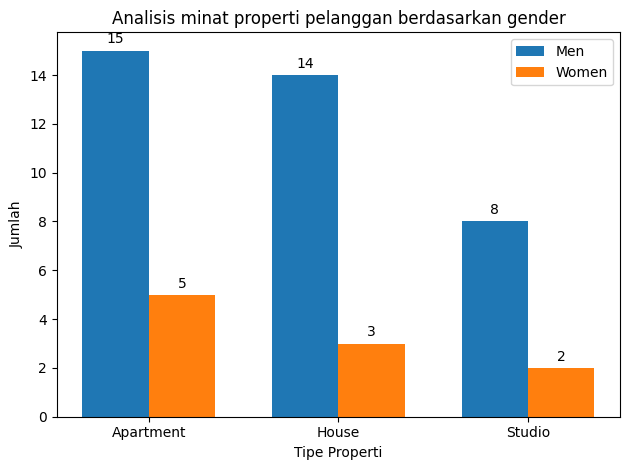

In [107]:
labels = ['Apartment','House','Studio']
men = [15,14,8]
women = [5,3,2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men, width, label='Men')
rects2 = ax.bar(x + width/2, women, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Tipe Properti')
ax.set_ylabel('Jumlah')
ax.set_title('Analisis minat properti pelanggan berdasarkan gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Berdasarkan data yang sudah dianalisis, didapatkan hasil bahwa:
1. Jumlah pengajuan pinjaman properti apartment adalah 20 unit, diantaranya 15 unit dari pria dan 5 unit dari wanita
1. Jumlah pengajuan pinjaman properti rumah adalah 17 unit, diantaranya 14 unit dari pria dan 3 unit dari wanita
1. Jumlah pengajuan pinjaman properti studio adalah 10 unit, diantaranya 8 unit dari pria dan 2 unit dari wanita

In [108]:
# labels = ['Apartment','House','Studio']
# Male = [15,14,8]
# Female = [5,3,2]
# width = 0.5

# fig,ax = plt.subplots()

# p1 = ax.bar(labels,Male,width,label="Male")
# p2 = ax.bar(labels,Female,width,label="Female")

# ax.set_xlabel('Tipe Properti')
# ax.set_ylabel('Jumlah')
# ax.legend()

# ax.bar_label(p1, label_type='center')
# ax.bar_label(p2, label_type='center')

# plt.show()

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam 

In [125]:
df.groupby(["loan_term_year", "married"])["loan_term_year"].count().to_frame()

loan_term_year
loan_term_year married                
7              Yes                   1
15             Yes                   3
25             No                    1
30             No                   18
               Yes                  23
40             No                    1

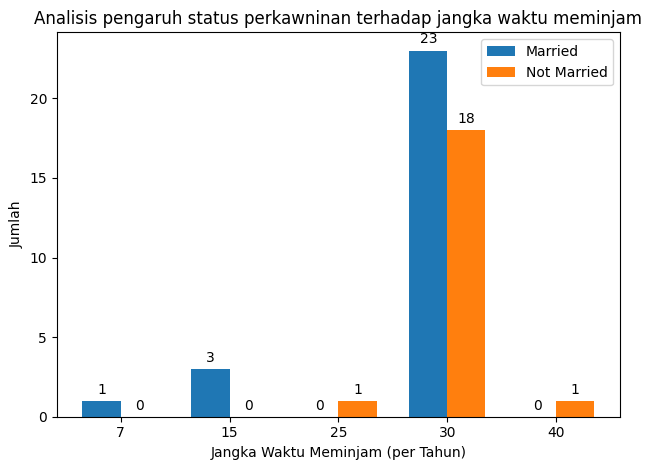

In [126]:
labels = [7,15,25,30,40]
married = [1,3,0,23,0]
not_married = [0,0,1,18,1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, married, width, label='Married')
rects2 = ax.bar(x + width/2, not_married, width, label='Not Married')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Jangka Waktu Meminjam (per Tahun)')
ax.set_ylabel('Jumlah')
ax.set_title('Analisis pengaruh status perkawninan terhadap jangka waktu meminjam')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Berdasarkan analisis tersebut, telah didapatkan insight yaitu:
1. Dalam pinjaman jangka waktu 7 tahun, terdapat 1 peminjam berstatus married
2. Dalam pinjaman jangka waktu 15 tahun, terdapat 3 peminjman berstatus married
3. Dalam pinjaman jangka waktu 25 tahun, terdapat 1 peminjam berstatus not married
4. Dalam pinjaman jangka waktu 30 tahun, terdapat 41 peminjam, diantaranya 23 orang berstatus married, dan 18 orang berstatus not married
5. Dalam pinjaman jangka waktu 40 tahun, terdapat 1 peminjam berstatus not married

In [112]:
# for x in df['loan_term_year']:
#     print(x)

In [113]:
# x = df.married
# y = df.loan_term_year
# plt.scatter(x,y)